In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
Url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [11]:
titanic=pd.read_csv(Url)

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic.shape

(891, 12)

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


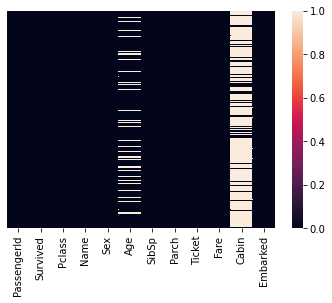

In [16]:
df = titanic.isnull()
sns.heatmap(df,yticklabels=False)

we can see that there are null values in age and cabin column

In [17]:
titanic = titanic.drop('Cabin',axis=1)

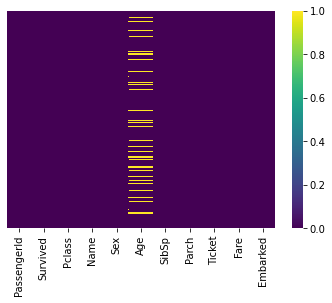

In [18]:
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

In [19]:
def imputate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [20]:
titanic["Age"] = titanic[['Age','Pclass']].apply(imputate_age,axis=1)

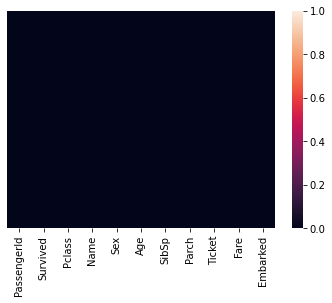

In [21]:
df = titanic.isnull()
sns.heatmap(df,yticklabels=False)

In [22]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [23]:
titanic.dropna(inplace=True)


In [24]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


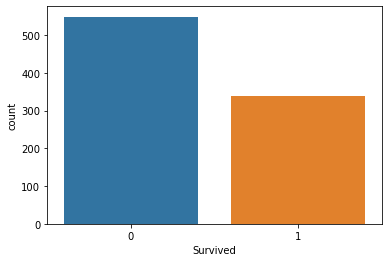

In [26]:
sns.countplot(titanic['Survived'])

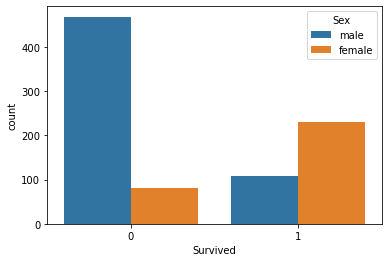

In [27]:
sns.countplot(x='Survived',hue='Sex',data=titanic)

In [28]:
X = titanic.drop(['PassengerId', 'Survived','Name', 'Ticket','Embarked'],axis=1)
y = titanic['Survived']

In [29]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,24.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


In [30]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    object 
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 88.6+ KB


In [32]:
X['Sex'] = pd.get_dummies(X['Sex']).values

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    uint8  
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 82.5 KB


In [35]:
X['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 889, dtype: uint8

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=343)

In [37]:
x_train.shape

(622, 6)

In [38]:
y_train.shape

(622,)

In [39]:
x_test.shape

(267, 6)

In [40]:
y_test.shape

(267,)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_test,y_test)

0.7715355805243446

In [42]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.8164794007490637

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [44]:
y_pred = dtc.predict(x_test)

In [46]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [47]:
Accuracy_score = accuracy_score(y_test,y_pred)
Accuracy_score

0.7715355805243446

In [48]:
con_mat=confusion_matrix(y_test,y_pred)

In [49]:
con_mat

array([[142,  28],
       [ 33,  64]], dtype=int64)

In [50]:
print(f"Cf_report : {classification_report(y_test,y_pred)}")

Cf_report :               precision    recall  f1-score   support

           0       0.81      0.84      0.82       170
           1       0.70      0.66      0.68        97

    accuracy                           0.77       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.77      0.77      0.77       267



In [51]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [53]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dtc,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [54]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [55]:
est_parameters=grid_search.best_params_

In [56]:
est_parameters

{'criterion': 'entropy',
 'max_depth': 18,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'splitter': 'random'}

In [57]:
Dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth =18, min_samples_leaf= 4,min_samples_split=5, splitter ='random')
Dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

In [58]:
Dtc.score(x_test,y_test)

0.8089887640449438